# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


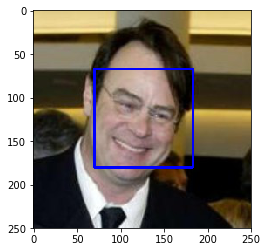

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def get_prop_human_in_pic(file_list):
    running_human_face_ct = 0
    for pic_path in tqdm(file_list):
        if face_detector(pic_path) == True:
            running_human_face_ct += 1
    return(running_human_face_ct/len(file_list))

prop_human_lfw = get_prop_human_in_pic(human_files_short)
prop_human_dogimages = get_prop_human_in_pic(dog_files_short)

print("The proportion of files w/human face in lfw is {:.2%}".format(prop_human_lfw))
print("The proportion of files w/human face in dogImages is {:.2%}".format(prop_human_dogimages))

100%|██████████| 100/100 [01:35<00:00,  3.33it/s]

The proportion of files w/human face in lfw is 98.00%
The proportion of files w/human face in dogImages is 17.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 99599714.10it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

GLOBAL_VGG16_TRANSFORM = transforms.Compose([transforms.RandomResizedCrop(224), 
                                             transforms.ToTensor()])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    im = Image.open(img_path)
    # Reshape tensor with batch size 1
    im = torch.unsqueeze(GLOBAL_VGG16_TRANSFORM(img=im),0)
    # Move data to cuda if needed
    if use_cuda == True :
        im = im.cuda()
    # Get VGG16 output
    pred_tensor = F.softmax(VGG16.forward(im), dim = 1)
    pred_index = torch.argmax(pred_tensor).detach().cpu().numpy()
    
    return pred_index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    # get predicted class label
    pred_index = VGG16_predict(img_path)
    # If index is between 151 and 268 inclusive, VGG predicted a dog
    if pred_index >= 151 and pred_index <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

results_human_list = [dog_detector(img) for img in human_files_short]
results_dog_list = [dog_detector(img) for img in dog_files_short]

In [10]:
print("prop of human_files_short w/detected dog = {:.2%}".format(np.mean(results_human_list)))
print("prop of dog_files_short w/detected dog = {:.2%}".format(np.mean(results_dog_list)))

prop of human_files_short w/detected dog = 2.00%
prop of dog_files_short w/detected dog = 79.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                           transforms.RandomVerticalFlip(),
                                           transforms.RandomRotation(10),
                                           transforms.RandomResizedCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_transform_val_test = transforms.Compose([transforms.CenterCrop(224),
                                              transforms.ToTensor(),
                                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


dog_train_data = datasets.ImageFolder('data/dogImages/train/', transform=data_transform_train)
dog_test_data = datasets.ImageFolder('data/dogImages/test/', transform=data_transform_val_test)
dog_validation_data = datasets.ImageFolder('data/dogImages/valid/', transform=data_transform_val_test)

train_loader = torch.utils.data.DataLoader(dog_train_data,
                                           batch_size=20,
                                           shuffle=True,
                                           num_workers=0)

test_loader = torch.utils.data.DataLoader(dog_test_data,
                                          batch_size=20,
                                          shuffle=True,
                                          num_workers=0)

validation_loader = torch.utils.data.DataLoader(dog_validation_data,
                                                batch_size=20,
                                                shuffle=True,
                                                num_workers=0)

In [13]:
loaders_scratch = {
    'train':train_loader,
    'test':test_loader,
    'valid':validation_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
+ For the training dataset, my performs a random crop of size 224 x 224. The tensor size chosen was (3 x 224 x 224) to match the input size of other well-known network architectures such as VGG16 and RESNET. Maintaining consistency would provide a better aligned benchmark to against which I could compare this simple network with much deeper ones. Additionally, choosing larger images sizes would have increased training times and perhaps also resulted in slower cnovergence. Conversely, smaller images risk cropping in locations of an image without any dogs (e.g. imagine a 10 x 10 random crop of a 1MP image for instance).
+ I augmented the training set by applying random horizontal and vertical flips, random rotation and random crops

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layers
        self.conv1 = nn.Conv2d(3, 16, 5, padding=2)
        self.conv2 = nn.Conv2d(16, 32, 5, padding=2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # batchnom
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.batchnorm4 = nn.BatchNorm2d(128)
        
        # linear layers
        self.fc1 = nn.Linear(128*14*14, 1024)
        self.fc3 = nn.Linear(1024, 133)
        
        # dropout
        self.dropoutLin = nn.Dropout(p=0.2)
    
    def forward(self, x):
        ## Define forward behavior
        # 224 -> 112
        x = self.pool(F.relu(self.conv1(x)))
        x = self.batchnorm1(x)
        # 112 -> 56
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batchnorm2(x)
        # 56 -> 28
        x = self.pool(F.relu(self.conv3(x)))
        x = self.batchnorm3(x)
        # 28 -> 14
        x = self.pool(F.relu(self.conv4(x)))
        x = self.batchnorm4(x)
        # Flatten for fully connect layer
        x = x.view(-1,128*14*14)
        x = F.relu(self.fc1(x))
        x = self.dropoutLin(x)
        x = F.log_softmax(self.fc3(x),dim=1)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
+  **Convolution Layers:** The first major architectural decision revolved around the number of convolutional layers specified in the model Our prior work with the CIFAR dataset and other use cases suggested 3 convolutional layers was sufficient for simple image classification tasks. However, dog breed classification is a much more fine-grained task. Additional convolutional layers would need to be added in order to extract more nuances features like fur or skin texture. I incremented the number of convolutional layers by 1 in order to see whether such a model could exceed 10%. Adding many layers and retraining from scratch would have greatly increased training times, so until proven that a simpler network could not exceed the accuracy requirement, I opted to be conservative here.
+ **Fully Connected Layers:** Similarly, I chose to only use two fully connected layer as the classifier. A single fully connected layer may not have the ability to express more complex non-linear interactions between the convolution layer ouputs. No additional linear layers were added for the time being because I felt that feature extraction from images is more efficient with an additional convolutional layer (if needed) versus additional linear layers. If required to increase the complexity (and therefore the parameters trained, longer training times, etc.), I would have opted for more convolutional layers than linear layers. 
+ **Filter Sizes:** Convolutional layer filter sizes were chosen such that they reflected some of the trends I noticed in the top imagenet models, namely smaller filter sizes, adding more if needed rather than increasing their size beyond 7 x 7 or even 5 x 5. My choice of 5 x 5 filters in the initial convolutional layers is based on the premise that these slighly larger filters would be able to "see" more of the image at a time, and that this would be more critical early in the network. (This hypothesis has yet to be proven)
+ **Regularization:** Regularization was achieved in two ways. First, the addition of batchnorm layers after each activation function. Secondly, a dropout layer was added inbetween the fully connected layers.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = torch.nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.Adam(params=model_scratch.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
from PIL import ImageFile 
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        print("EPOCH = "+str(epoch))
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        print("MODEL TRAIN")
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            #if batch_idx % 10 == 0:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            ## record the average training loss, using something like
            # train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        print("MODEL VALIDATE")
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
        
        
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model

from workspace_utils import active_session

## Model from scratch was trained for 50 epochs. 
## Commented out so that training does not execute when notebook is rerun unless intended

# with active_session():
#     # train the model
#     model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
#                           criterion_scratch, use_cuda, 'model_scratch.pt')

# # load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt',map_location=lambda storage, loc: storage))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.193931


Test Accuracy: 22% (192/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders

data_transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                           transforms.RandomRotation(10),
                                           transforms.RandomResizedCrop(224),
                                           transforms.ToTensor(),
                                           # RESNET50 normalization taken from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#sphx-glr-beginner-transfer-learning-tutorial-py
                                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data_transform_val_test = transforms.Compose([transforms.Resize(256),
                                              transforms.CenterCrop(224),
                                              transforms.ToTensor(),
                                              # RESNET50 normalization taken from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#sphx-glr-beginner-transfer-learning-tutorial-py
                                              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

dog_train_data = datasets.ImageFolder('data/dogImages/train/', transform=data_transform_train)
dog_test_data = datasets.ImageFolder('data/dogImages/test/', transform=data_transform_val_test)
dog_validation_data = datasets.ImageFolder('data/dogImages/valid/', transform=data_transform_val_test)

train_loader = torch.utils.data.DataLoader(dog_train_data,
                                           batch_size=20,
                                           shuffle=True,
                                           num_workers=0)

test_loader = torch.utils.data.DataLoader(dog_test_data,
                                          batch_size=20,
                                          shuffle=True,
                                          num_workers=0)

validation_loader = torch.utils.data.DataLoader(dog_validation_data,
                                                batch_size=20,
                                                shuffle=True,
                                                num_workers=0)

loaders_transfer = {
    'train':train_loader,
    'test':test_loader,
    'valid':validation_loader
}

In [20]:
# Fetch RESNET50 Model
RESNET50 = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    RESNET50 = RESNET50.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:06<00:00, 14681977.55it/s]


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
import torchvision.models as models
import torch.nn as nn
import copy

## TODO: Specify model architecture 
model_transfer = copy.deepcopy(RESNET50)

# Freeze training for all layers except the fully connected layer
for name, child in model_transfer.named_children():
    if name != 'fc':
        for param in child.parameters():
            param.requires_grad = False
            
# edit last fully connected layer
model_transfer.fc = torch.nn.Linear(2048,133)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
+ **Model Selection:** Initially, I attempted this transfer learning exercise with VGG16, but was unable to achieve >30% accuracy, so I considered using the pretrained versions of InceptionV3 and RESNET50, which have high Top-1 and Top-5 accuracy on Imagenet, but with less computational overhead than deeper nets (e.g. RESNET100, etc.). I selected RESNET50 in my first pass because the preprocessing steps were more similar to that of VGG16, and if the 50-layer network did not provide sufficient accuracy, I could substitue deeper RESNETs without changing the preprocessing pipeline. Because RESNET50 achieved > 70% accuracy, I did not experiment any further
+ **Transfer Learning:** My assumption was that RESNET50 would have extracted more features from the supplied input images than VGG16 would, so as a first attempt, I edited the final fully connected layer to output a 133 length tensor, corresponding to the number of dog breed classes. If additional accuracy was needed, I would have required gradient calculation, and therefore backpropagation to occur on the last few convolutional layers. Because the training dataset was not particularly large (~ 6.6k training images), it probably would not have been easy to retrain many layers of the network, even if initialized with the pre-trained weights.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [22]:
criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(params=model_transfer.fc.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
## Model from scratch was trained for 50 epochs. 
## Commented out so that training does not execute when notebook is rerun unless intended

# train the model
# with active_session():
#     model_transfer = train(10, loaders_transfer, model_transfer,
#                            optimizer_transfer, criterion_transfer,
#                            use_cuda, 'model_transfer_resnet50.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer_resnet50.pt', map_location=lambda storage, loc: storage))
# The VGG16 net version of the model below
# model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [24]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

## 10 iter RESNET
# Test Loss: 0.542685
# Test Accuracy: 84% (703/836)

## From prior runs: 10 iter VGG
# Test Loss: 2.558388
# Test Accuracy: 28% (239/836)

Test Loss: 0.542685


Test Accuracy: 84% (703/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [25]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in dog_train_data.classes]

def predict_breed_transfer(img_path, data_transform = data_transform_train):
    # load the image and return the predicted breed
    im = Image.open(img_path)
    # Reshape tensor with batch size 1
    im = torch.unsqueeze(data_transform(img=im),0)
    # Move data to cuda if needed
    if use_cuda == True :
        im = im.cuda()
    # Get predicted output
    pred_tensor = F.softmax(model_transfer.forward(im), dim = 1)
    pred_index = torch.argmax(pred_tensor).detach().cpu().numpy()
    
    return class_names[pred_index]

In [26]:
def get_img_tensor(img_path, transforms = data_transform_val_test):
    im = Image.open(img_path)
    # Reshape tensor with batch size 1
    im = torch.unsqueeze(transforms(img=im),0)
    
    return(im)

def get_prediction(model, img):
    if use_cuda == True :
        img = img.cuda()
    # Get predicted output
    pred_tensor = model.forward(img)
    pred_index = torch.argmax(pred_tensor).detach().cpu().numpy()
    
    return(pred_index)

def is_dog(img_path, model, transforms):
    im = get_img_tensor(img_path, transforms)
    # Move data to cuda if needed
    if use_cuda == True :
        im.cuda()
    
    # get the predicted class index
    pred_index = get_prediction(model, im)
    
    # If index is between 151 and 268 inclusive, the model predicted a dog
    if pred_index >= 151 and pred_index <= 268:
        return True
    else:
        return False

In [39]:
# Taken from pytorch docs
# should be the same as data_transform_val_test
RESNET_TRANSFORM = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])])

# Set models to eval mode
RESNET50.eval()
model_transfer.eval()

# Confirm that dog files return dog == TRUE and dog == FALSE for human files
print(is_dog(dog_files[10], RESNET50, RESNET_TRANSFORM))
print(is_dog(human_files[10], RESNET50, RESNET_TRANSFORM))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

True
False


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [28]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def show_img(img_path):
    plt.figure()
    plt.imshow(Image.open(img_path))
    plt.show()

def run_app(img_path):
    RESNET50.eval()
    model_transfer.eval()
    
    print("Image Path = "+img_path)
    ## handle cases for a human face, dog, and neither
    # Use pretrained RESNET50 for dog identification
    IS_DOG = is_dog(img_path, RESNET50, RESNET_TRANSFORM)
    # Use OpenCV face detector for humans
    IS_HUMAN = face_detector(img_path)
    # Show input image
    show_img(img_path)
    
    if IS_DOG == True:
        print("Dog Detected. Predicted Breed = "+predict_breed_transfer(img_path))
    elif IS_HUMAN == True:
        print("Human Detected. Resembling Breed = "+predict_breed_transfer(img_path))
    else:
        print('Error: No dog or human detected')
    
    print("#-----------------------------------#")


Image Path = /data/lfw/Ali_Adbul_Karim_Madani/Ali_Adbul_Karim_Madani_0001.jpg


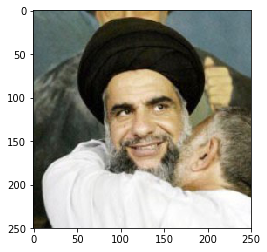

Human Detected. Resembling Breed = Dogue de bordeaux
#-----------------------------------#


In [29]:
# Pick a random human image, get sample output
i = np.random.uniform(low=0,high=len(human_files)-1,size=1).astype(int)
run_app(human_files[i[0]])

Image Path = /data/dog_images/train/034.Boxer/Boxer_02427.jpg


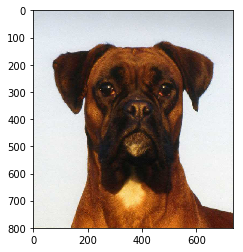

Dog Detected. Predicted Breed = Boxer
#-----------------------------------#


In [30]:
# Pick a random dog image, get sample output
i = np.random.uniform(low=0,high=len(dog_files)-1,size=1).astype(int)
run_app(dog_files[i[0]])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1. **Provide Output Variability:** While the algorithm does a good job distinguishing between dogs, humans and neither, the dog breed classifier outputs seem to exhibit some variability. This is especially apparent in a few cases (see below):
    + Mixed breed dogs tend to combine features of its parent breeds. If these features are manifest physically, and captured in an image, the predicted breed may vary quite often when each prediction is performed
    + For human inputs, the volatility in predicted breed is apparent as well. For example, in the very last cell of this notebook, the model ascribes nearly equal probabilities to 5 different breeds.
    
    One potential improvement would be to provide some measure of output stability, which the user can interpret as a type of "confidence" in the prediction. For example, given 100 inferences, predictions highly concentrated in a single label indicate *high confidence*, whereas more diffuse distribution is indicative of *low confidence*


2. **Additional Image Preprocessing:** Busy backgrounds or underexposure tend to result in poorer inference outcomes. This could be caused by the feature extraction capturing additional noise, namely elements of an image that are not actually the dog. Underexposure could also result in very dark and "flat" images where feature extractors cannot capture fur textures or even edges. Additional processing that addresses these situations could result in superior performance. As an example, compare `golden_retriver.jpg` to `french_bulldog.jpg` below. The stock french bulldog photo strips away the background, and thus the spread of predicted dog breeds is a bit narrower than that of the golden retriever photo.


3. **Improved Dog / Not Dog Classification:** The current algorithm uses a pre-trained RESNET to determine whether or not there is a dog in the supplied input image. However, the decision rule is defined as whether or not the model returns a predicted class label that fits one of the specific breed labels in Imagenet. Potentially, this means that breeds of dogs not included in the training set may not be detected. We can get a sense of this error by taking a look at the recall and false positive rate for VGG16 for the dog/not dog classification task. 

    Earlier in this script, on a sample of 100 dog images, only 79 returned TRUE for dog. Additionally, for a set of 100 humans, 2 were classified as dogs, suggesting a False Positive rate of 2%. We can apply transfer learning here by retraining the final fully connected layer on a 2-class {Dog, Not Dog} or 3-class {Dog, Human, Neither} problem. This should allow us to improve the overall accuracy of the algorithm.
    
    Of course, this problem could also be solved by employing a more accurate model. At the very end of this notebook, RESNET50 was tested using the same images. 100/100 dog images were correctly identified as having a dog, while 0% of human images returned a dog prediction.

### Testing on Sample Images

Image Path = ./sample_images/49766439_308804346413247_2832951877161713664_n.jpg


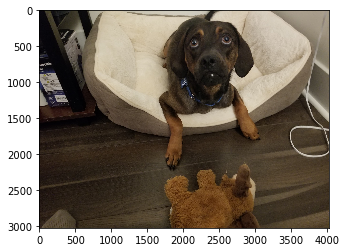

Dog Detected. Predicted Breed = Dachshund
#-----------------------------------#
Image Path = ./sample_images/49938493_2334348800133081_4729987946248142848_n.jpg


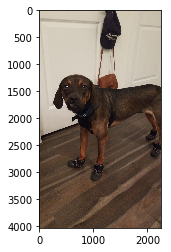

Dog Detected. Predicted Breed = Dogue de bordeaux
#-----------------------------------#
Image Path = ./sample_images/50962038_1147674782089619_3951861948068397056_n.jpg


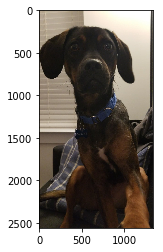

Dog Detected. Predicted Breed = Basenji
#-----------------------------------#
Image Path = ./sample_images/51216173_2217661121618337_8445022670310866944_n.jpg


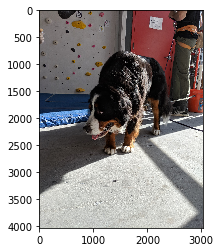

Dog Detected. Predicted Breed = Bernese mountain dog
#-----------------------------------#
Image Path = ./sample_images/cat.jpg


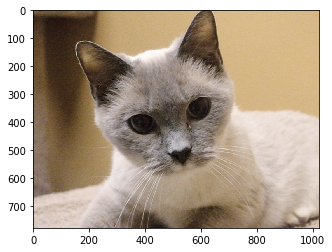

Error: No dog or human detected
#-----------------------------------#
Image Path = ./sample_images/ed_sheeran.jpg


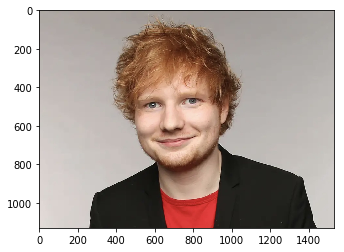

Human Detected. Resembling Breed = Norfolk terrier
#-----------------------------------#
Image Path = ./sample_images/french_bulldog.jpg


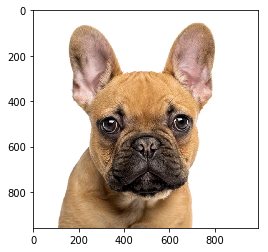

Dog Detected. Predicted Breed = French bulldog
#-----------------------------------#
Image Path = ./sample_images/golden_retriver.jpg


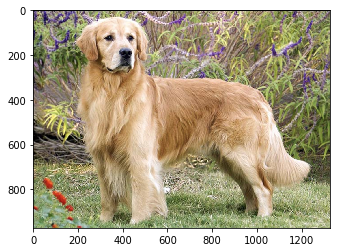

Dog Detected. Predicted Breed = Golden retriever
#-----------------------------------#
Image Path = ./sample_images/meryl_streep.jpg


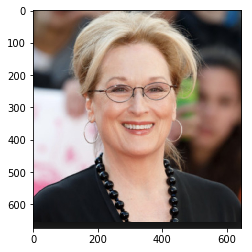

Human Detected. Resembling Breed = Poodle
#-----------------------------------#
Image Path = ./sample_images/paris.jpg


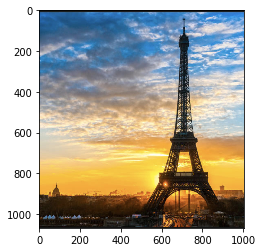

Error: No dog or human detected
#-----------------------------------#


In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
sample_files = np.array(glob("./sample_images/*"))
sample_files.sort()

for file in sample_files:
    try:
        run_app(file)
    except:
        pass

### Resampling Predictions

**Mixed Breed Dog, Dark Background**

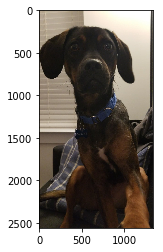

Dachshund                     41
Bloodhound                    18
German shorthaired pointer    13
Cardigan welsh corgi          11
Beauceron                      5
Basenji                        3
Saint bernard                  3
American foxhound              1
Basset hound                   1
Cane corso                     1
Boykin spaniel                 1
Greater swiss mountain dog     1
Chinese shar-pei               1
dtype: int64

In [32]:
import pandas as pd
show_img("./sample_images/50962038_1147674782089619_3951861948068397056_n.jpg")
pred_breeds_dark_photo = [predict_breed_transfer("./sample_images/50962038_1147674782089619_3951861948068397056_n.jpg") for i in range(0,100)]
pd.Series(pred_breeds_dark_photo).value_counts()

**French Bulldog, Stock Photo**

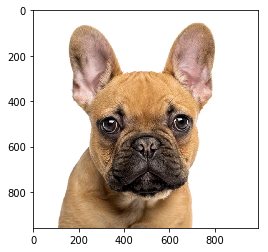

French bulldog      91
Basenji              6
Chinese shar-pei     2
Bullmastiff          1
dtype: int64

In [33]:
show_img("./sample_images/french_bulldog.jpg")
pred_breeds_stock_photo = [predict_breed_transfer("./sample_images/french_bulldog.jpg") for i in range(0,100)]
pd.Series(pred_breeds_stock_photo).value_counts()

**Golden Retriever with Busy Background**

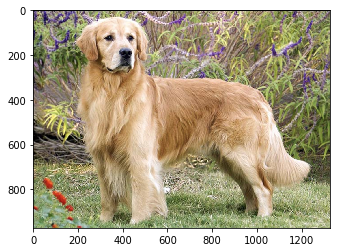

Golden retriever                      89
Belgian tervuren                       3
Nova scotia duck tolling retriever     2
English cocker spaniel                 2
Briard                                 1
Brussels griffon                       1
Dachshund                              1
Irish terrier                          1
dtype: int64

In [34]:
show_img("./sample_images/golden_retriver.jpg")
pred_breeds_busy_background_photo = [predict_breed_transfer("./sample_images/golden_retriver.jpg") for i in range(0,100)]
pd.Series(pred_breeds_busy_background_photo).value_counts()

**Ed Sheeran**

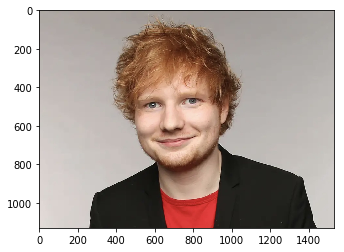

Norfolk terrier                  24
Havanese                         16
Dogue de bordeaux                15
English cocker spaniel           14
Silky terrier                    14
Dachshund                         8
Cardigan welsh corgi              2
Cavalier king charles spaniel     2
Field spaniel                     2
Pomeranian                        1
Briard                            1
Bull terrier                      1
dtype: int64

In [35]:
show_img("./sample_images/ed_sheeran.jpg")
pred_breeds_human_photo = [predict_breed_transfer("./sample_images/ed_sheeran.jpg") for i in range(0,100)]
pd.Series(pred_breeds_human_photo).value_counts()

### Dog Detector Recall

In [37]:
results_dog_list = [is_dog(img, RESNET50, RESNET_TRANSFORM) for img in dog_files_short]
print("prop of dog_files_short w/detected dog (RESNET50) = {:.2%}".format(np.mean(results_dog_list)))

prop of dog_files_short w/detected dog (RESNET50) = 100.00%


### Dog Detector False Positives

In [38]:
results_human_list = [is_dog(img, RESNET50, RESNET_TRANSFORM) for img in human_files_short]
print("prop of human_files_short w/detected dog (RESNET50) = {:.2%}".format(np.mean(results_human_list)))

prop of human_files_short w/detected dog (RESNET50) = 0.00%
